In [1]:
import os 
import re
import pandas as pd
import numpy as np
import pip
import glob
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
import pandas as pd
import statsmodels.formula.api as smf
import numpy as np

# Load the dataset from the given directory
file_path = "/work/SabrinaSchrollZakiHansen#5217/ACN_F24/ACN_Portfolio_2/out/df.csv"
df = pd.read_csv(file_path)

df = df.dropna(subset=["rt_select"])
# Calculate mean reaction time per participant
df['mean_rt_participant'] = df['rt_select'].mean()

In [37]:
df

,condition,onset_decks,deck_select,dur_decks,rt_select,onset_win,ID,t_moves,frames_before_decks,loss,...,init_mark,n_moves,total,frames_after_decks,exp_type,no,win,dur_win,subject_id,mean_rt_participant
0,iowa_exp,1.049204,2.0,300,3.504827,8.535259,NaN,[2.868397400015965],330,0,...,0,1,100,150,"['fMRI', 'EEG', 'MEG']",1,100,120,138,1.789296
1,iowa_exp,16.037049,2.0,300,4.265737,23.535915,NaN,"[17.55351330002304, 18.47008180001285, 19.2027...",330,0,...,2,3,200,150,"['fMRI', 'EEG', 'MEG']",2,100,120,138,1.789296
2,iowa_exp,31.037626,2.0,300,1.849055,38.536638,NaN,[31.970002399990335],330,0,...,0,1,300,150,"['fMRI', 'EEG', 'MEG']",3,100,120,138,1.789296
3,iowa_exp,46.038406,2.0,300,3.649119,53.537322,NaN,"[47.254009999975096, 48.10489560000133]",330,0,...,3,2,400,150,"['fMRI', 'EEG', 'MEG']",4,100,120,138,1.789296
4,iowa_exp,61.039126,3.0,300,4.832486,68.554720,NaN,"[62.1388918000157, 63.42140739999013, 65.02138...",330,0,...,3,3,450,150,"['fMRI', 'EEG', 'MEG']",5,50,120,138,1.789296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,iowa_exp,526.065365,3.0,300,0.732178,533.564288,NaN,[],330,-50,...,2,0,650,150,"['fMRI', 'EEG', 'MEG']",36,50,120,140,1.789296
956,iowa_exp,541.066058,3.0,300,0.782266,548.565022,NaN,[],330,0,...,2,0,700,150,"['fMRI', 'EEG', 'MEG']",37,50,120,140,1.789296
957,iowa_exp,556.066949,3.0,300,2.148826,563.565802,NaN,"[557.5990591999143, 557.9491123999469]",330,-50,...,0,2,700,150,"['fMRI', 'EEG', 'MEG']",38,50,120,140,1.789296
958,iowa_exp,571.067541,3.0,300,4.099024,578.566494,NaN,[572.6997954999097],330,0,...,1,1,750,150,"['fMRI', 'EEG', 'MEG']",39,50,120,140,1.789296


In [38]:
model = smf.mixedlm("rt_select ~ n_moves", data=df, groups=df["mean_rt_participant"], re_formula="~1")
result = model.fit()

/work/student_folders/sabrina_folder/virt_env/lib/python3.12/site-packages/statsmodels/regression/mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


In [39]:
# Print the summary of the regression model
print(result.summary())

# Get the residuals from the model
df['residuals'] = result.resid

# Check residuals
print(df[['session', 'residuals']].head())

# Step 2: Adjust residuals so that the lowest residual becomes 0
min_residual = df['residuals'].min()  # Find the minimum residual
df['adjusted_residuals'] = df['residuals'] - min_residual  # Subtract the minimum from all residuals

# Optionally, save results
df.to_csv("/work/SabrinaSchrollZakiHansen#5217/ACN_F24/ACN_Portfolio_2/out/df_with_residuals.csv", index=False)


         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: rt_select 
No. Observations: 952     Method:             REML      
No. Groups:       1       Scale:              0.7423    
Min. group size:  952     Log-Likelihood:     -1213.4716
Max. group size:  952     Converged:          Yes       
Mean group size:  952.0                                 
---------------------------------------------------------
           Coef.  Std.Err.    z     P>|z|  [0.025  0.975]
---------------------------------------------------------
Intercept  1.185     0.863   1.373  0.170  -0.506   2.876
n_moves    0.380     0.024  15.796  0.000   0.332   0.427
Group Var  0.742                                         

   session  residuals
0        1   1.940377
1        1   1.942232
2        1   0.284605
3        1   1.705141
4        1   2.508980


In [42]:
# Load the dataset from the given directory
file_path = "/work/SabrinaSchrollZakiHansen#5217/ACN_F24/ACN_Portfolio_2/out/switch_df.csv"
switch_df = pd.read_csv(file_path)

# Clean 'session' column in switch_df
switch_df['session'] = switch_df['session'].apply(
    lambda x: int(x.strip("(),")) if isinstance(x, str) else x
)

# Ensure all values are integers
switch_df['session'] = switch_df['session'].astype(int)

# Convert 'session' column in both DataFrames to integers
df['session'] = df['session'].astype(int)
switch_df['session'] = switch_df['session'].apply(lambda x: int(x.strip("(),")) if isinstance(x, str) else x)

# Perform the merge
merged_df = pd.merge(df, switch_df, on=['session'], how='outer')

# Verify the result
print(merged_df.head())

# Calculate confidence value by multiplying adjusted_residuals with switch_frequency
# Handle NaN values (ensure no missing data for the calculation)
merged_df['confidence_value'] = merged_df['adjusted_residuals'] * merged_df['switch_frequency']

# Calculate overall median confidence value for the entire dataset
overall_median_confidence = merged_df['confidence_value'].median()

# Create a new column for confidence (1 for below median, 0 for above)
merged_df['confidence'] = merged_df['confidence_value'].apply(
    lambda x: 1 if x < overall_median_confidence else 0
)
# Optionally, save results
merged_df.to_csv("../out/merged_df.csv",index=False)

  condition  onset_decks  deck_select  dur_decks  rt_select  onset_win  ID  \
0  iowa_exp     1.049204          2.0        300   3.504827   8.535259 NaN   
1  iowa_exp     1.049204          2.0        300   3.504827   8.535259 NaN   
2  iowa_exp     1.049204          2.0        300   3.504827   8.535259 NaN   
3  iowa_exp     1.049204          2.0        300   3.504827   8.535259 NaN   
4  iowa_exp     1.049204          2.0        300   3.504827   8.535259 NaN   

               t_moves  frames_before_decks  loss  ...  win  dur_win  \
0  [2.868397400015965]                  330     0  ...  100      120   
1  [2.868397400015965]                  330     0  ...  100      120   
2  [2.868397400015965]                  330     0  ...  100      120   
3  [2.868397400015965]                  330     0  ...  100      120   
4  [2.868397400015965]                  330     0  ...  100      120   

   subject_id_x  mean_rt_participant  residuals  adjusted_residuals  \
0           138            

In [44]:
# Normalize the 'session' column to ensure consistent formatting
merged_df['session'] = merged_df['session'].apply(lambda x: x[0] if isinstance(x, tuple) else x)

# Group by 'session' and check the distribution of 'confidence'
distribution = merged_df.groupby('session')['confidence'].value_counts().unstack(fill_value=0)

# Display the corrected distribution
print(distribution)

confidence     0     1
session               
1           1232   172
2            746   682
3            633   807
4            245  1195


In [45]:
merged_df
merged_df.to_csv("../out/merged_df.csv",index=False)

In [2]:
file_path = "/work/SabrinaSchrollZakiHansen#5217/ACN_F24/ACN_Portfolio_2/out/merged_df.csv"
merged_df = pd.read_csv(file_path)

<Figure size 1400x800 with 0 Axes>

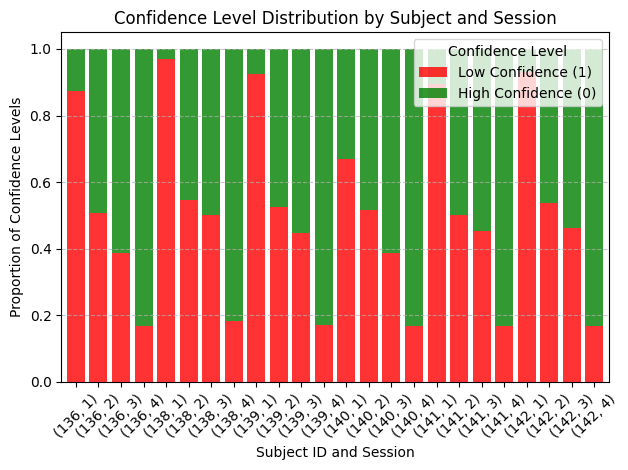

<Figure size 1600x800 with 0 Axes>

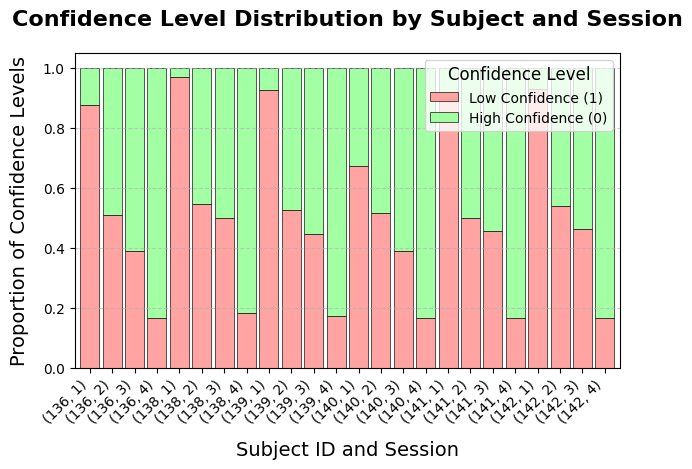

In [6]:
# Group data by subject and session, calculate the proportion of confidence levels
confidence_by_subject_session = merged_df.groupby(['subject_id_x', 'session'])['confidence'].value_counts(normalize=True).unstack(fill_value=0)

# Plot confidence levels per subject and session
plt.figure(figsize=(14, 8))
confidence_by_subject_session.plot(kind='bar', stacked=True, color=['red', 'green'], alpha=0.8, width=0.8)
plt.title('Confidence Level Distribution by Subject and Session')
plt.xlabel('Subject ID and Session')
plt.ylabel('Proportion of Confidence Levels')
plt.legend(['Low Confidence (1)', 'High Confidence (0)'], title="Confidence Level")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Enhanced plot for confidence levels by subject and session
plt.figure(figsize=(16, 8))

# Plotting confidence levels
confidence_by_subject_session.plot(
    kind='bar',
    stacked=True,
    color=['#FF9999', '#99FF99'],  # Softer red and green for better aesthetics
    alpha=0.9,
    width=0.85,
    edgecolor='black',
    linewidth=0.5
)

# Adding title and labels with enhanced formatting
plt.title('Confidence Level Distribution by Subject and Session', fontsize=16, weight='bold', pad=20)
plt.xlabel('Subject ID and Session', fontsize=14, labelpad=10)
plt.ylabel('Proportion of Confidence Levels', fontsize=14, labelpad=10)

# Customizing legend
plt.legend(
    ['Low Confidence (1)', 'High Confidence (0)'],
    title="Confidence Level",
    title_fontsize=12,
    fontsize=10,
    loc='upper right'
)

# Adjusting grid and ticks
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(rotation=45, fontsize=10, ha='right')
plt.yticks(fontsize=10)

# Adding a tight layout for better spacing
plt.tight_layout()

plt.show()
